# Oasis InfoByte - Data Science Internship
## Task 3 - Sales Prediction Regression

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [83]:
data_url = "https://www.kaggle.com/datasets/bumba5341/advertisingcsv"
data_path = "/mnt/a/Codes/Data/Advertising.csv"
Data = pd.DataFrame(pd.read_csv(data_path))
Data.head(7)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8


In [84]:
# Removing Unimportant Feature
Data = Data.drop(columns = 'Unnamed: 0')
Data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data exploration

In [85]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [86]:
Data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [87]:
data = Data

## Visualizing Advertisement Expenses vs Return

Text(0, 0.5, 'Sales (in thousands')

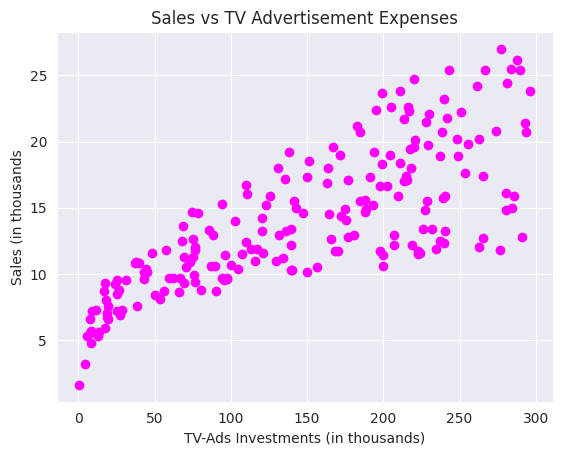

In [88]:
plt.scatter(data.TV,data.Sales, color = "magenta")
plt.title("Sales vs TV Advertisement Expenses")
plt.xlabel("TV-Ads Investments (in thousands)")
plt.ylabel("Sales (in thousands")

Text(0, 0.5, 'Sales (in thousands')

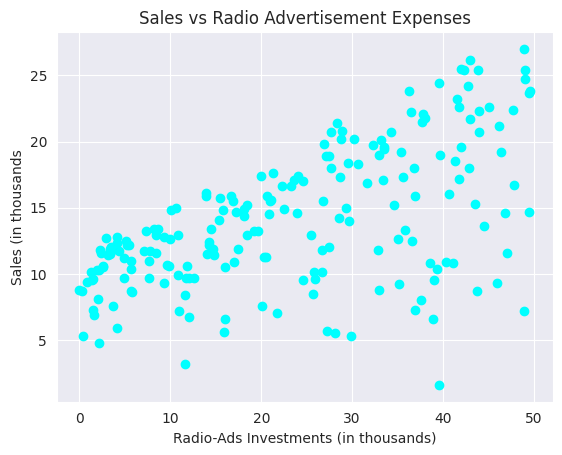

In [89]:
plt.scatter(data.Radio,data.Sales, color = "cyan")
plt.title("Sales vs Radio Advertisement Expenses")
plt.xlabel("Radio-Ads Investments (in thousands)")
plt.ylabel("Sales (in thousands")

Text(0, 0.5, 'Sales (in thousands')

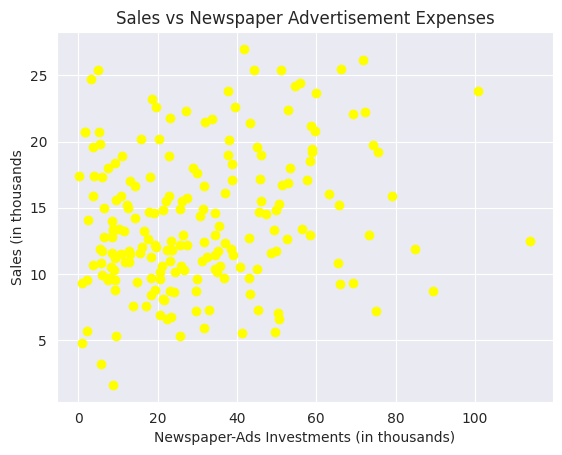

In [90]:
plt.scatter(data.Newspaper,data.Sales, color="yellow")
plt.title("Sales vs Newspaper Advertisement Expenses")
plt.xlabel("Newspaper-Ads Investments (in thousands)")
plt.ylabel("Sales (in thousands")

Text(0, 0.5, 'Sales (in thousands')

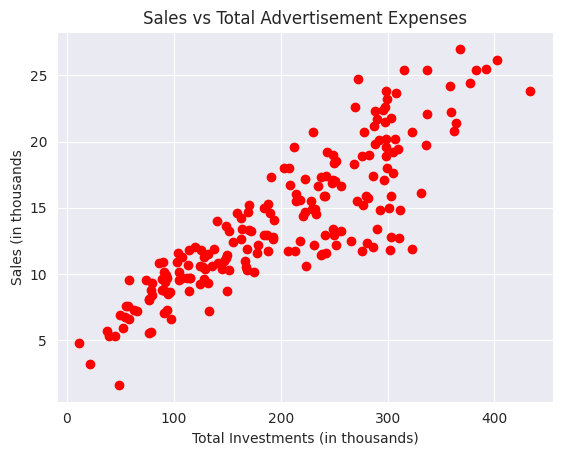

In [91]:
plt.scatter(data.TV+data.Radio+data.Newspaper,data.Sales, color = "red")
plt.title("Sales vs Total Advertisement Expenses")
plt.xlabel("Total Investments (in thousands)")
plt.ylabel("Sales (in thousands")

## Correlation Analysis for input-output features and their combinations

In [92]:
corr_dict = {}

for i in data.iloc[:,:3]:
    corr_dict[i] = round(data[i].corr(data.Sales),3)

corr_dict["TV+Radio"] = round(pd.Series(data.TV+data.Radio).corr(data.Sales),3)
corr_dict["TV+Newspaper"] = round(pd.Series(data.TV+data.Newspaper).corr(data.Sales),3)
corr_dict["Radio+Newspaper"] = round(pd.Series(data.Radio+data.Newspaper).corr(data.Sales),3)
corr_dict["Total"] = round(pd.Series(data.TV+data.Radio+data.Newspaper).corr(data.Sales),3)

In [93]:
corr_dict

{'TV': 0.782,
 'Radio': 0.576,
 'Newspaper': 0.228,
 'TV+Radio': 0.861,
 'TV+Newspaper': 0.804,
 'Radio+Newspaper': 0.445,
 'Total': 0.868}

Text(0.5, 0, 'Investments')

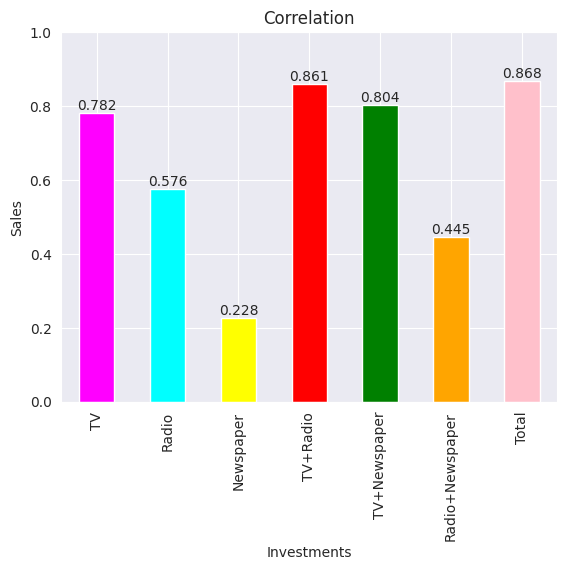

In [94]:
ax = pd.Series(corr_dict).plot(kind = "bar", color =["magenta", "cyan", "yellow", "red", "green", "orange", "pink"])
ax.bar_label(ax.containers[0])
plt.title("Correlation")
plt.ylim(0,1)
plt.ylabel("Sales")
plt.xlabel("Investments")

In [95]:
# Adding combined Investments and removing low correlated Features

data.insert(3,"TV+Radio",pd.Series(data.TV+data.Radio))
data.insert(4,"TV+Newspaper",pd.Series(data.TV+data.Newspaper))
data.insert(5,"Total(All Ads)",pd.Series(data.TV+data.Radio+data.Newspaper))
data = data.drop(columns=["Newspaper"])

In [96]:
data

,TV,Radio,TV+Radio,TV+Newspaper,Total(All Ads),Sales
0,230.1,37.8,267.9,299.3,337.1,22.1
1,44.5,39.3,83.8,89.6,128.9,10.4
2,17.2,45.9,63.1,86.5,132.4,9.3
3,151.5,41.3,192.8,210.0,251.3,18.5
4,180.8,10.8,191.6,239.2,250.0,12.9
...,...,...,...,...,...,...
195,38.2,3.7,41.9,52.0,55.7,7.6
196,94.2,4.9,99.1,102.3,107.2,9.7
197,177.0,9.3,186.3,183.4,192.7,12.8
198,283.6,42.0,325.6,349.8,391.8,25.5


## Data splitting

In [97]:
X = data.iloc[:,:5]
Y = data.Sales

In [98]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test = tts(X,Y, train_size=0.69)

## Model creation and training

In [99]:
from sklearn.linear_model import LinearRegression as LinR

In [100]:
models = {}

for col in X.columns:
    models[col] = LinR().fit(pd.DataFrame(X_train[col].values), Y_train.values)

models

{'TV': LinearRegression(),
 'Radio': LinearRegression(),
 'TV+Radio': LinearRegression(),
 'TV+Newspaper': LinearRegression(),
 'Total(All Ads)': LinearRegression()}

## Creating Predictions

In [101]:
predictions={}

for col in X.columns:
    predictions[col] = models[col].predict(pd.DataFrame(X_test[col]).values)

predictions = pd.DataFrame(predictions)

predictions

,TV,Radio,TV+Radio,TV+Newspaper,Total(All Ads)
0,17.132947,13.989555,17.470659,15.970927,16.109339
1,14.802215,13.371299,14.772828,15.649470,15.619608
2,10.442539,12.394056,9.771969,10.898514,10.405701
3,7.197158,17.100780,7.428449,6.076649,6.527425
4,12.880058,16.103592,13.370765,12.037798,12.517976
...,...,...,...,...,...
57,20.926189,16.442636,22.228561,24.413919,25.552743
58,10.377539,13.291524,9.928879,9.768685,9.446025
59,17.564735,9.681706,16.848083,16.958937,16.074711
60,20.517615,17.778867,22.122268,22.622265,24.009347


In [102]:
Y_test = Y_test.reset_index()
Y_test = Y_test.Sales
predictions.insert(0,"Original", Y_test)

In [103]:
predictions

,Original,TV,Radio,TV+Radio,TV+Newspaper,Total(All Ads)
0,17.4,17.132947,13.989555,17.470659,15.970927,16.109339
1,14.5,14.802215,13.371299,14.772828,15.649470,15.619608
2,10.5,10.442539,12.394056,9.771969,10.898514,10.405701
3,1.6,7.197158,17.100780,7.428449,6.076649,6.527425
4,15.2,12.880058,16.103592,13.370765,12.037798,12.517976
...,...,...,...,...,...,...
57,23.8,20.926189,16.442636,22.228561,24.413919,25.552743
58,11.3,10.377539,13.291524,9.928879,9.768685,9.446025
59,11.6,17.564735,9.681706,16.848083,16.958937,16.074711
60,26.2,20.517615,17.778867,22.122268,22.622265,24.009347


## Model Comparison based on performance evaluation

In [104]:
from sklearn.metrics._regression import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error, d2_absolute_error_score, mean_absolute_percentage_error

In [105]:
mse = {}
msle = {}
mae = {}
d2ae = {}
mape = {}
r2 = {}
for model in models.keys():
    mse[model] = mean_squared_error(predictions.Original,predictions[model])
    msle[model] = mean_squared_log_error(predictions.Original,predictions[model])
    mae[model] = mean_absolute_error(predictions.Original,predictions[model])
    r2[model] = r2_score(predictions.Original,predictions[model])
    mape[model] = mean_absolute_percentage_error(predictions.Original,predictions[model])
    d2ae[model] = d2_absolute_error_score(predictions.Original,predictions[model])

metrics = [mse,msle,mae,mape,d2ae,r2]

titles = ['mse','msle','mae','mape','d2ae','r2']
colors = ["magenta", "cyan",  "red", "green", "orange", "violet"]

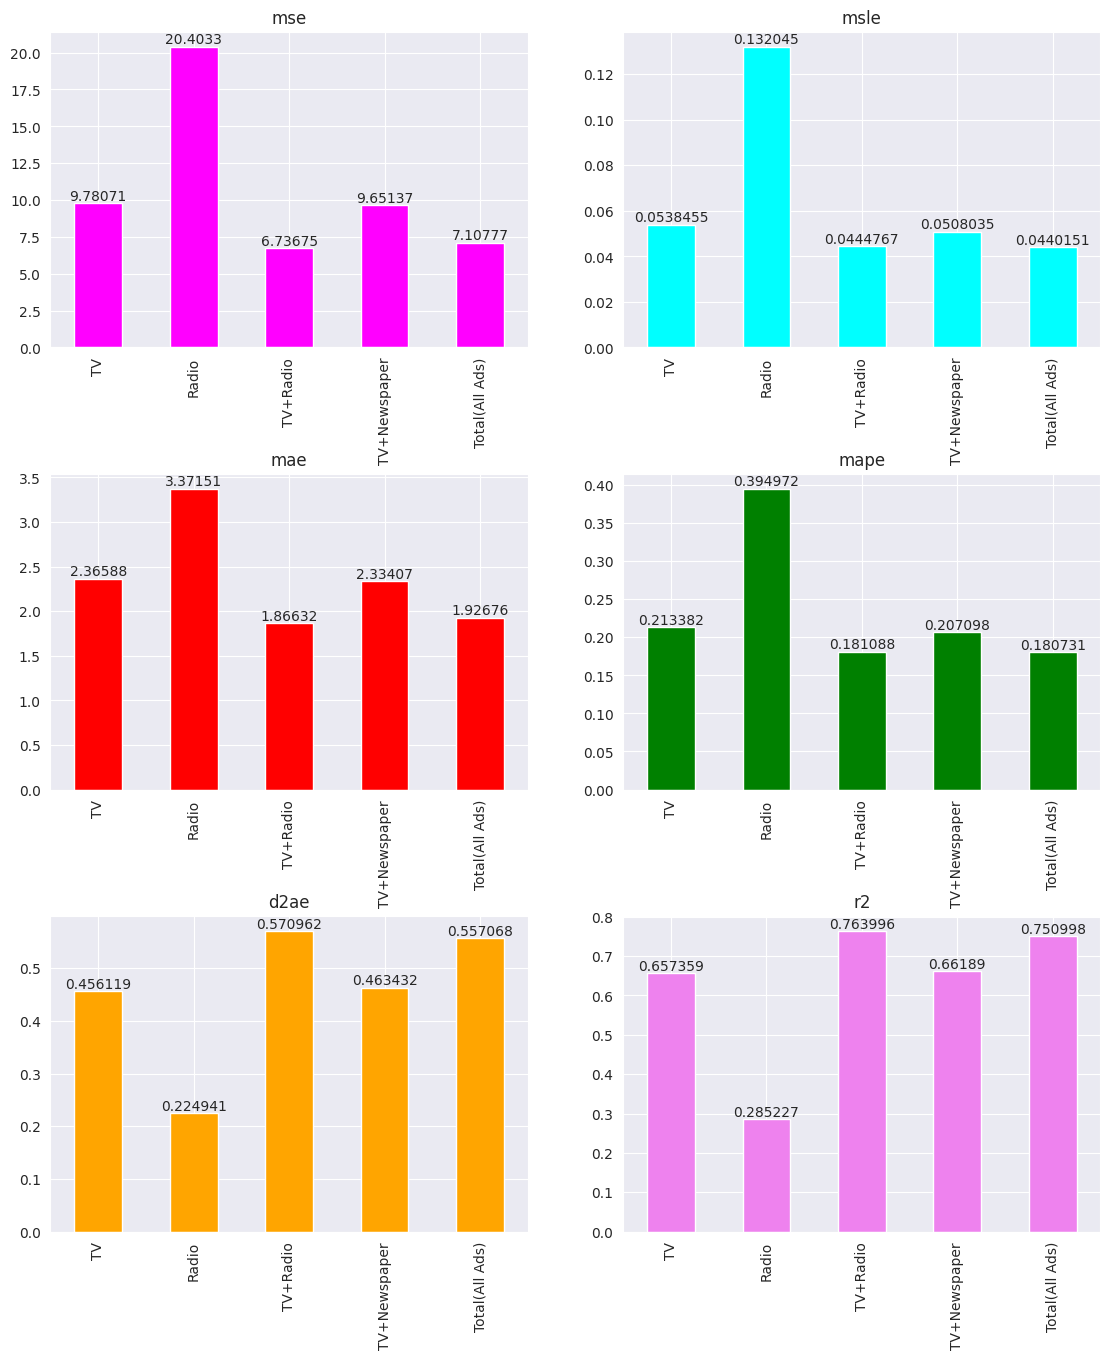

In [106]:
fig = plt.figure(figsize=(15, 15))
rows = 3
columns = 2
for i in range(1,7):
        fig.add_subplot(rows, columns, i)
        plt.title(titles[i-1])
        ax = pd.Series(metrics[i-1]).plot(kind = 'bar', color = colors[i-1])
        ax.bar_label(ax.containers[0])


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.8,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)

In [107]:
pd.DataFrame(metrics, index=titles).transpose()

,mse,msle,mae,mape,d2ae,r2
TV,9.780708,0.053845,2.365882,0.213382,0.456119,0.657359
Radio,20.403258,0.132045,3.371508,0.394972,0.224941,0.285227
TV+Radio,6.736747,0.044477,1.866315,0.181088,0.570962,0.763996
TV+Newspaper,9.651368,0.050804,2.334069,0.207098,0.463432,0.661890
Total(All Ads),7.107772,0.044015,1.926755,0.180731,0.557068,0.750998


## Regression Plot

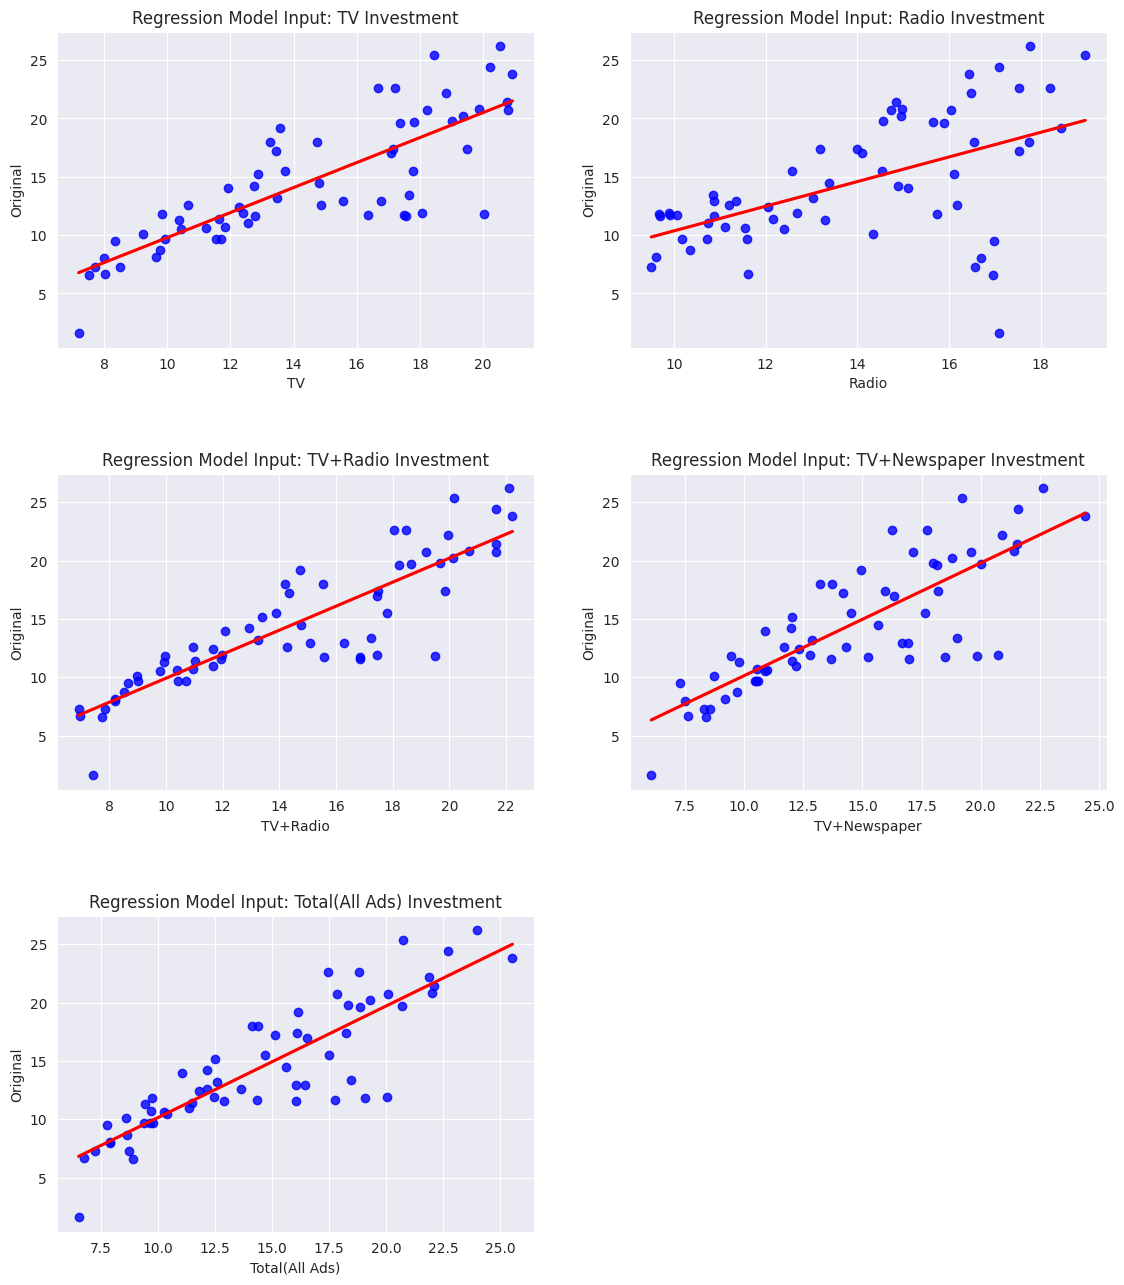

In [108]:
preds = list(predictions.drop(columns='Original').keys())

fig = plt.figure(figsize=(15, 15))
rows = 3
columns = 2
for i in range(1,6):
        fig.add_subplot(rows, columns, i)
        plt.title("Regression Model Input: "+preds[i-1]+" Investment")
        sns.regplot(x = predictions[preds[i-1]], y = predictions.Original, scatter_kws = {"color": "blue"}, line_kws={"color": "red" }, ci=0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.8,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)


## Conclusion: The investment in TV and Radio together gains the most Sales return as per the analysis, since Newspaper investment alone does not affect the sales much.